In [1]:
from mga import *
from selection import *
from ckx import *
from mutation import *
from problem import *
from metrics import classification_metrics_kfold

import matplotlib.pyplot as plt
import numpy as np
import math

Progress: 5/10000, Fitness: 1.1135497779685557
Progress: 11/10000, Fitness: 0.2889513081340552
Progress: 1001/10000, Fitness: 0.13761674594173662
Progress: 2003/10000, Fitness: 0.09275303095470945
Progress: 3005/10000, Fitness: 0.07097466143510177
Progress: 4001/10000, Fitness: 0.05409967016919433
Progress: 5003/10000, Fitness: 0.04523716702841092
Progress: 6005/10000, Fitness: 0.04074979363390207
Progress: 7001/10000, Fitness: 0.035019215418922264
Progress: 8001/10000, Fitness: 0.029588185912341452
Progress: 9003/10000, Fitness: 0.027289730373667397
Progress: 10005/10000, Fitness: 0.026059303967988712
Progress: 5/10000, Fitness: 0.44232372048080437
Progress: 11/10000, Fitness: 0.3095861403219766
Progress: 1003/10000, Fitness: 0.27744742660426713
Progress: 2005/10000, Fitness: 0.26271718267678273
Progress: 3005/10000, Fitness: 0.19277530257456482
Progress: 4005/10000, Fitness: 0.1507247721388524
Progress: 5001/10000, Fitness: 0.12105951192877766
Progress: 6005/10000, Fitness: 0.1018359

No handles with labels found to put in legend.


Progress: 10003/10000, Fitness: 0.1278140345199699


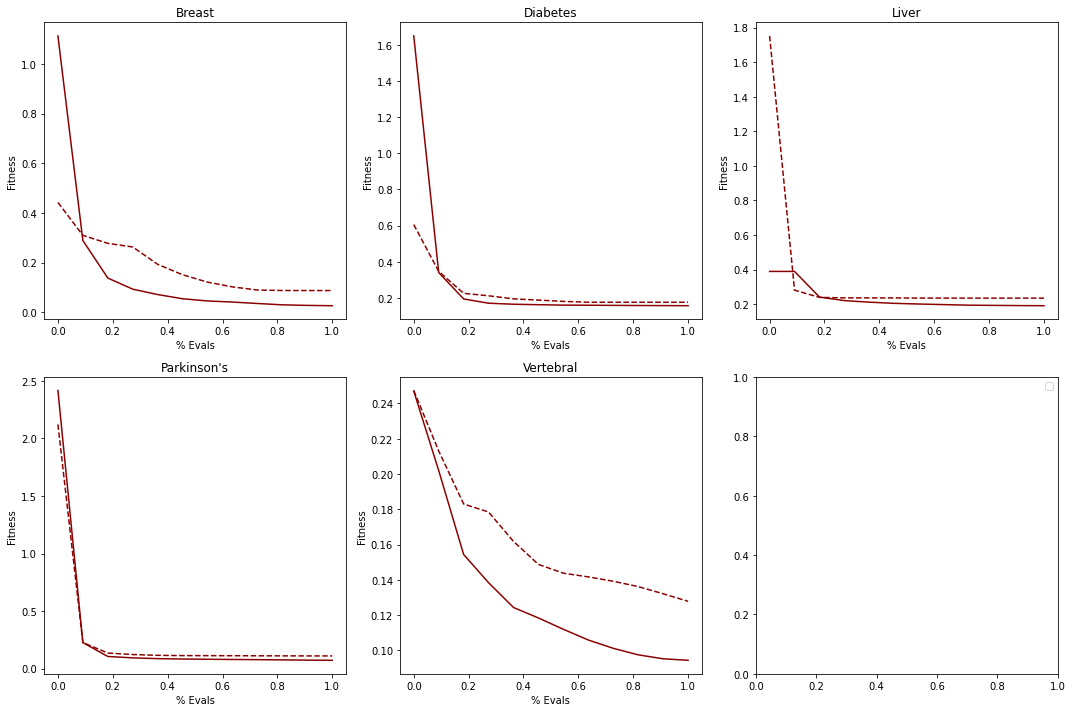

In [2]:
fig, ax = plt.subplots(2,3,gridspec_kw={'height_ratios':[5,5]})
fig.set_size_inches(15.0,10.0)

titulos = ["Breast", "Diabetes", "Liver", "Parkinson's", "Vertebral"]

i = 0
for dataset in ["BreastCancer", "diabetes", "Liver", "parkinsons", "Vertebral"]:
    dataset_name = f'{dataset}/{dataset}'
    route_dataset = ".\\data\\"

    problem = ffnnKFold(route_dataset, dataset_name)
    algorithm = MicroGAFFNN(
        problem=problem,
        mutation=UniformMutation(0.01),
        crossover=CrossKnowledgeCrossover(0.9),
        selection=BinaryTournamentSelection(),
        max_evaluations=10000,
        freq = 1000,
    )
    algorithm.run()
    history_with_um = algorithm.get_history()


    problem = ffnnKFold(route_dataset, dataset_name)

    algorithm_no_mut = MicroGAFFNN(
        problem=problem,
        mutation=None,
        crossover=CrossKnowledgeCrossover(1.0),
        selection=BinaryTournamentSelection(),
        max_evaluations=10000,
        freq = 1000,
    )

    algorithm_no_mut.run()
    history_without_um = algorithm_no_mut.get_history()

    t = np.linspace(0.0,1.0,len(history_without_um))

    row = math.floor(i/3)
    col = i%3
    ax[row][col].plot(t,history_with_um, color='darkred', label='With UM')
    ax[row][col].plot(t,history_without_um, linestyle="dashed", color='darkred', label='Without UM')

    ax[row][col].set(xlabel='% Evals', ylabel='Fitness',
       title=titulos[i])
    
    i+=1
plt.legend()
fig.tight_layout()
plt.show()


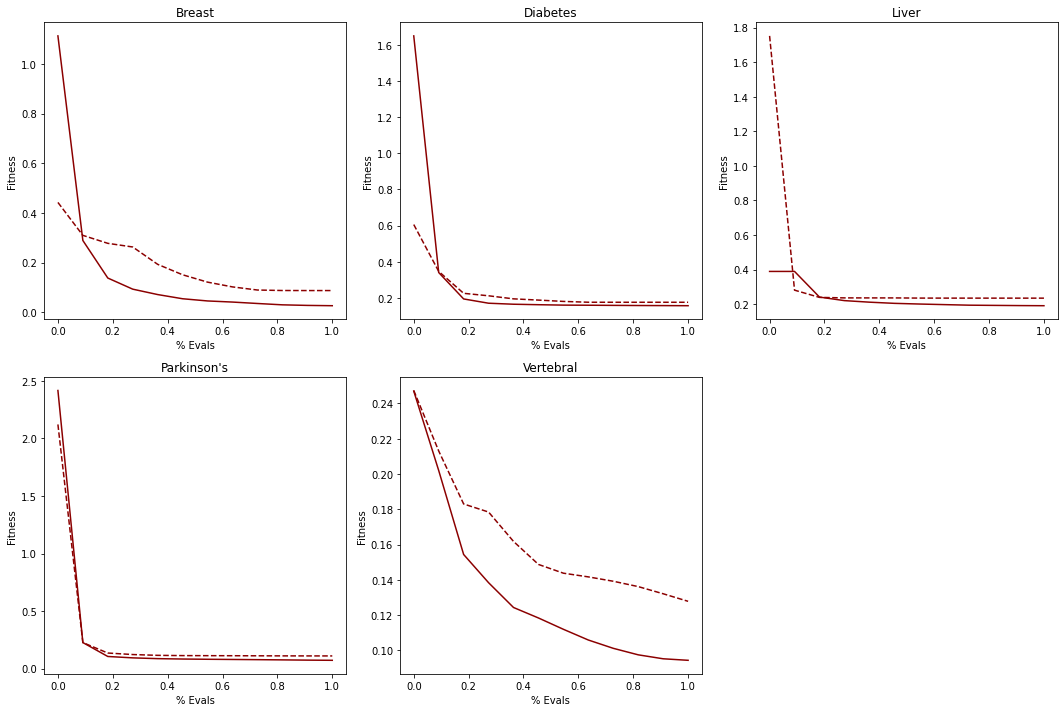

In [7]:
#fig.delaxes(ax[1][2])
plt.style.use('ggplot')
fig